<a href="https://colab.research.google.com/github/yuriragu/BasicSession/blob/main/%EC%A7%84%EC%9C%A0%EB%A6%AC_Visualization_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WordCloud

In [2]:
!pip install konlpy
import re
import konlpy
import pandas as pd

     |████████████████████████████████| 19.4 MB 61.0 MB/s 
     |████████████████████████████████| 448 kB 42.9 MB/s 


In [3]:
!pip install wordcloud

In [ ]:
!pip install konlpy

In [10]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('/content/과제_뉴스 기사.txt', encoding='utf-8') as f:
    text = f.readlines()
    

In [7]:
from google.colab import files
file_uploaded = files.upload()

Saving 과제_뉴스 기사.txt to 과제_뉴스 기사.txt


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)


In [12]:
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [14]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [16]:
#나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [18]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [19]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/

In [20]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [24]:
# Generate a word cloud image
wc = WordCloud(font_path = path,
                        background_color = 'white',
                        width=512, height=512,
                        max_font_size=500,
                        max_words=1000)
wc.generate_from_frequencies(dict(c))
    

wc.to_file('output.png')

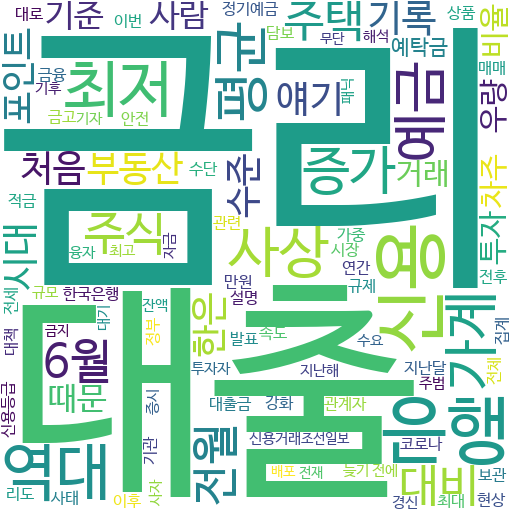

In [29]:
from IPython.display import Image
Image('output.png')

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('C:/Users/endea/Desktop/data/22-1학기 기초세션 시각화/train.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [ ]:
import datetime as dt

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.day
train['hr'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['sec'] = train['datetime'].dt.second
train['day'] = train['datetime'].dt.weekday

datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [ ]:
train['day'] = train['day'].map({0:'Monday',
                             1:'Tuesday',
                             2:'Wednesday',
                             3:'Thursday',
                             4:'Friday',
                             5:'Saturday',
                            6:'Sunday'},
                           na_action= "ignore")

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [ ]:
train.year.unique()

array([2011, 2012], dtype=int64)

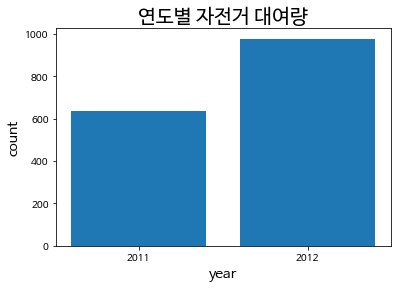

In [ ]:
plt.bar(data=train,
        x='year',
        height='count')
plt.title('연도별 자전거 대여량', fontsize=20) 
plt.ylabel('count', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.xticks(np.arange(2011, 2013, 1), labels = ['2011','2012'])
plt.show()

> 2011년보다 2012년에 자전거 대여 홍보를 더 많이 했거나, 날씨가 좋아서 야외활동에 더 적합했을 수 있다

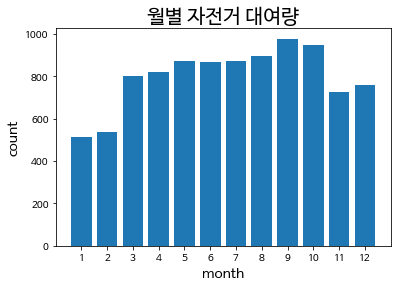

In [ ]:
plt.bar(data=train,
        x='month',
        height='count')
plt.title('월별 자전거 대여량', fontsize=20) 
plt.ylabel('count', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.xticks(np.arange(1,13,1))
plt.show()

> 3월부터 10월까지의 대여량이 상대적으로 많다. 이때는 봄,여름,가을일 때이므로 야외활동하기에 적합한 날씨여서 대여량이 높은 것으로 추측할 수 있다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [ ]:
import datetime

In [ ]:
from time import strftime

In [ ]:
train['year'] = train['year'].astype(str)
train['month'] = train['month'].astype(str)

In [ ]:
train['yr_mon'] = train['year'] + " " + train['month']

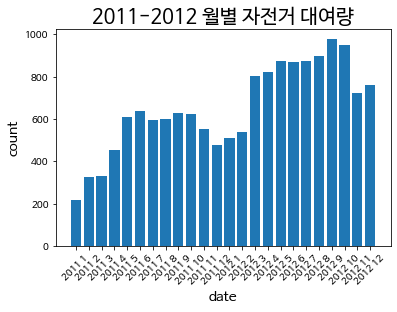

In [ ]:
plt.bar(data=train,
        x='yr_mon',
        height='count')
plt.title('2011-2012 월별 자전거 대여량', fontsize=20) 
plt.ylabel('count', fontsize=14)
plt.xlabel('date', fontsize=14)
plt.xticks(rotation=45)
plt.show()

> 2012년에 전체적으로 대여량이 늘었는데, 2012년 12월의 대여량 또한 늘었기 때문에 전체 기간으로 봤을 때 12월이 1월보다 대여량이 높게 나왔다

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [ ]:
train['work'] = train['datetime'].dt.weekday

In [ ]:
train['work'] = train['work'].map({0:'weekday',
                             1:'weekday',
                             2:'weekday',
                             3:'weekday',
                             4:'weekday',
                             5:'weekend',
                            6:'weekend'},
                           na_action= "ignore")

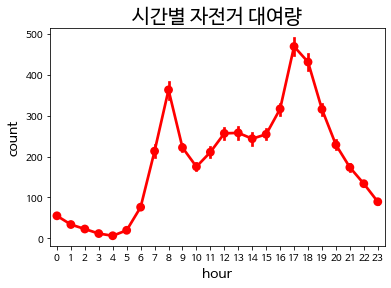

In [ ]:
sns.pointplot(data = train, x = 'hr', y = 'count', color='red')

plt.title('시간별 자전거 대여량', fontsize = 20)
plt.ylabel('count', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.show()

> 오전 8시와 오후 5시에 가장 대여량이 많음. 보통 근무일이 휴일보다 많은데, 근무일의 특성이 8시는 출근시간이고 오후 5시-6시는 퇴근시간임. 따라서 출퇴근에 자전거를 대여하는 사람들의 모습이 많이 반영된 것으로 보임

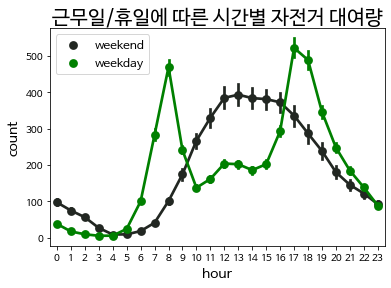

In [ ]:
sns.pointplot(data = train, x = 'hr', y = 'count', hue = 'work', color='green')

plt.title('근무일/휴일에 따른 시간별 자전거 대여량', fontsize=20)
plt.ylabel('count', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.legend(fontsize=12)
plt.show()

> 휴일은 주활동시간인 오후시간이 될수록 점진적으로 대여량이 많아지는 반면, 근무일은 출퇴근 시간에 대여량이 집중됨. 근무일에 출퇴근 용으로 자전거를 대여하는 사람이 많은것으로 보임

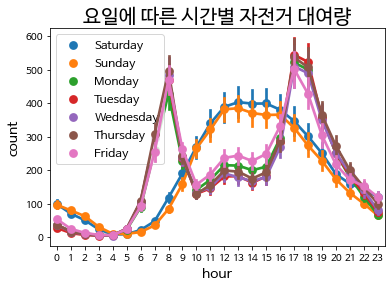

In [ ]:
sns.pointplot(data = train, x = 'hr', y = 'count', hue = 'day')

plt.title('요일에 따른 시간별 자전거 대여량', fontsize=20)
plt.ylabel('count', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.legend(fontsize=12)
plt.show()

> 근무일인 월-금요일에는 위의 근무일 대여량 그래프와 양상이 비슷하고, 휴일인 토-일요일은 위의 휴일 그래프와 양상이 비슷함. 따라서 평일에는 출퇴근 용으로 자전거를 대여하고, 주말에는 주 활동시간에 자전거를 대여하는 것으로 볼 수 있음

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [ ]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

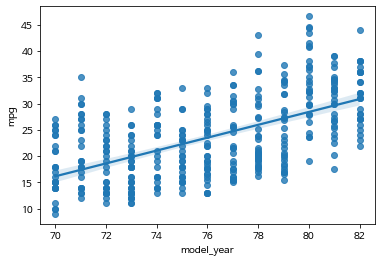

In [ ]:
sns.regplot(data = mpg, x = 'model_year', y = 'mpg')

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
